<a href="https://colab.research.google.com/github/tnewtont/ModCloth_Recommendation_System/blob/main/rsp_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec

# **Reading the data**

In [2]:
# Reading the original data
df = pd.read_csv('/content/df_modcloth.csv')

In [3]:
df.head()

,item_id,user_id,rating,timestamp,size,fit,user_attr,model_attr,category,brand,year,split
0,7443,Alex,4,2010-01-21 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0
1,7443,carolyn.agan,3,2010-01-27 08:00:00+00:00,NaN,NaN,NaN,Small,Dresses,NaN,2012,0
2,7443,Robyn,4,2010-01-29 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0
3,7443,De,4,2010-02-13 08:00:00+00:00,NaN,NaN,NaN,Small,Dresses,NaN,2012,0
4,7443,tasha,4,2010-02-18 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99893 entries, 0 to 99892
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   item_id     99893 non-null  int64  
 1   user_id     99892 non-null  object 
 2   rating      99893 non-null  int64  
 3   timestamp   99893 non-null  object 
 4   size        78133 non-null  float64
 5   fit         81387 non-null  object 
 6   user_attr   91526 non-null  object 
 7   model_attr  99893 non-null  object 
 8   category    99893 non-null  object 
 9   brand       25913 non-null  object 
 10  year        99893 non-null  int64  
 11  split       99893 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 9.1+ MB


In [5]:
# Numerical-type columns
df.select_dtypes(exclude = 'object').columns.tolist()

['item_id', 'rating', 'size', 'year', 'split']

In [6]:
# Object-type columns
df.select_dtypes(include = 'object').columns.tolist()

['user_id', 'timestamp', 'fit', 'user_attr', 'model_attr', 'category', 'brand']

In [7]:
df.describe()

,item_id,rating,size,year,split
count,99893.000000,99893.000000,78133.000000,99893.000000,99893.000000
mean,83944.091208,4.209594,3.217322,2015.476450,0.358564
std,43558.135979,1.080633,1.885934,1.970262,0.720993
min,6454.000000,1.000000,0.000000,2010.000000,0.000000
25%,48629.000000,4.000000,2.000000,2014.000000,0.000000
50%,77878.000000,5.000000,3.000000,2016.000000,0.000000
75%,120126.000000,5.000000,4.000000,2017.000000,0.000000
max,155950.000000,5.000000,8.000000,2019.000000,2.000000


# **Checking for Nulls**

In [8]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values(by = 'percent_missing', ascending = False)

,column_name,percent_missing
brand,brand,74.059243
size,size,21.783308
fit,fit,18.525823
user_attr,user_attr,8.375962
user_id,user_id,0.001001
item_id,item_id,0.000000
rating,rating,0.000000
timestamp,timestamp,0.000000
model_attr,model_attr,0.000000
category,category,0.000000


We observe that brand, size, fit, and user_attr contain the most nulls. As for user_id, there's only one missing value.

# **Distribution of Category**

Let's extract the number of product categories and see what each proportion they make up.

In [9]:
categories = df['category'].value_counts().index.tolist()
categories

['Tops', 'Dresses', 'Bottoms', 'Outerwear']

In [10]:
categories_count = df['category'].value_counts().values.tolist()
categories_count

[34977, 34160, 23625, 7131]

In [11]:
categories_pct = [cc / sum(categories_count) for cc in categories_count]
categories_pct

[0.35014465478061524,
 0.3419659035167629,
 0.2365030582723514,
 0.07138638343027039]

In [12]:
categories_df = pd.concat([pd.Series(categories), pd.Series(categories_pct)], axis = 1)
categories_df.rename(columns = {0: 'categories', 1: 'categories_pct'}, inplace = True)
categories_df.set_index('categories', inplace = True)

<Axes: title={'center': 'Breakdown of Product Categories'}, ylabel='categories_pct'>

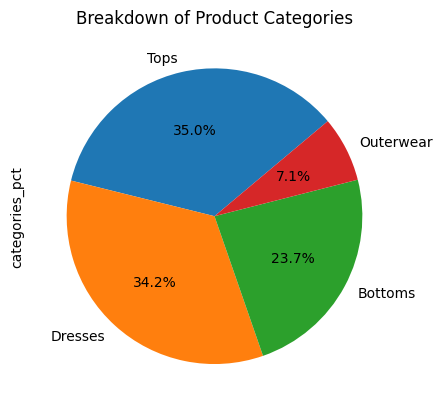

In [13]:
categories_df.plot.pie(y = 'categories_pct',
                       title = "Breakdown of Product Categories",
                       legend = False,
                       autopct= '%1.1f%%',
                       startangle = 40
                       )


Tops, Dresses, and Bottoms, make the most share in total product categories.

# **Distribution of Items and Ratings**

Now we want to look at how many items there are, relative to ratings and users.

In [14]:
# The number of unique users

df['user_id'].nunique()

44783

Now we want to see how many ratings each item has.

In [15]:
item_id_list = df['item_id'].value_counts().index.tolist()

In [16]:
len(item_id_list) # There are 1020 unique types of products

1020

In [17]:
df['item_id'].value_counts()

,count
item_id,
34935,1887
21296,1636
32405,1599
32406,1494
32403,1378
...,...
148277,1
152576,1
151956,1


There are some items that have over 1000 ratings, whereas some only have one.

In [18]:
df['item_id'].value_counts().describe()

,count
count,1020.000000
mean,97.934314
std,216.416612
min,1.000000
25%,8.750000
50%,17.000000
75%,66.000000
max,1887.000000


In [19]:
item_id_counts = df['item_id'].value_counts().values.tolist()

We see that the average number of ratings is about 98, but the median number of ratings is 17, which indicates skewness.

Now we investigate the mean ratings per user and the overall distribution of it.

In [20]:
df.groupby('user_id')['rating'].mean()

,rating
user_id,
"""Ferrari"")",4.00
#,5.00
#1dad,5.00
'Chelle,3.50
'Tree',4.50
...,...
zurajohnson,3.75
zuzu_zoom,4.00
🇦🇺,3.00


In [21]:
user_ratings_vals = df.groupby('user_id')['rating'].mean().values
usernames = df.groupby('user_id')['rating'].mean().index

In [22]:
item_ratings_vals = df.groupby(['item_id'])['rating'].mean().values

In [23]:
# Summary statistics for user_ratings_vals
df.groupby('user_id')['rating'].mean().describe()

,rating
count,44783.000000
mean,4.218998
std,0.976925
min,1.000000
25%,4.000000
50%,4.500000
75%,5.000000
max,5.000000


In [24]:
# Summary statistics fpr items_ratings_vals
df.groupby(['item_id'])['rating'].mean().describe()

,rating
count,1020.000000
mean,4.070268
std,0.540718
min,1.000000
25%,3.820599
50%,4.167749
75%,4.452922
max,5.000000


Text(0, 0.5, 'Frequency')

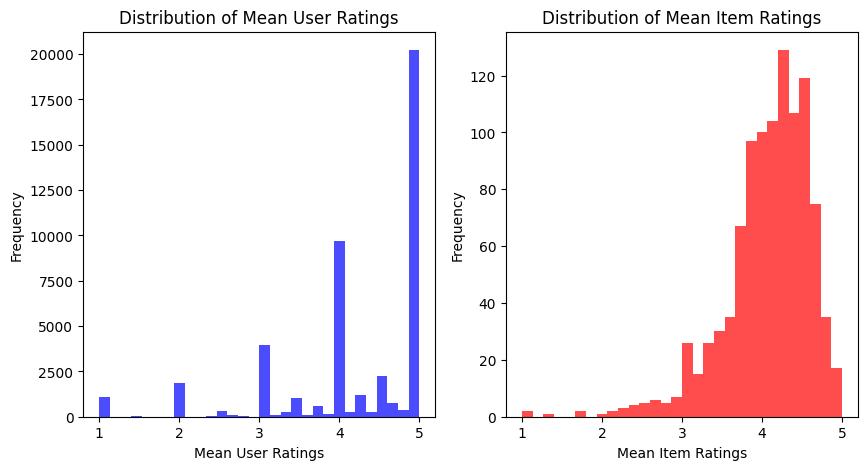

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.hist(user_ratings_vals, bins=30, color='blue', alpha=0.7)
ax1.set_title('Distribution of Mean User Ratings')
ax1.set_xlabel('Mean User Ratings')
ax1.set_ylabel('Frequency')

ax2.hist(item_ratings_vals, bins=30, color = 'red', alpha = 0.7)
ax2.set_title('Distribution of Mean Item Ratings')
ax2.set_xlabel('Mean Item Ratings')
ax2.set_ylabel('Frequency')

Based on the mean, median, and standard deviation statistics, as well as the histograms plotted above, the mean user ratings and the mean item ratings share similar distributions and show skewness. However, the mean user ratings tends to vary more than the mean item ratings.

Let's now investigate the distribution of the number of reviews given per user.

In [26]:
ratings_counts = df.groupby('user_id')['rating'].count()
ratings_counts.sort_values(ascending = False, inplace = True)
ratings_counts

,rating
user_id,
Sarah,250
Amanda,204
jennifer,198
Laura,197
Jennifer,191
...,...
esea,1
esconway89,1
eschultze21,1


We see that some users have reviewed over 100 or even close to 200 products, whereas some have only reviewed a single product.

In [27]:
df.groupby('user_id')['rating'].count().describe()

,rating
count,44783.000000
mean,2.230579
std,6.548969
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,250.000000


In [28]:
# Range of ratings_counts
np.max(ratings_counts) - np.min(ratings_counts)

249

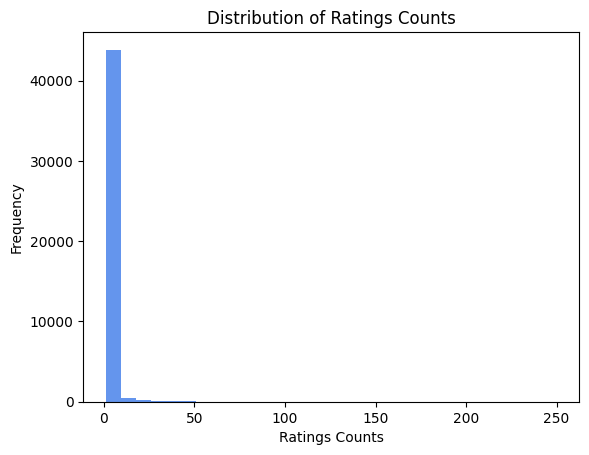

In [29]:
plt.hist(ratings_counts.values, color = 'cornflowerblue', bins = 30)
plt.title('Distribution of Ratings Counts')
plt.xlabel('Ratings Counts')
plt.ylabel('Frequency');

We observe that the number of reviews that a user gives substantially varies and that the majority of them give 2 reviews.

Since some products can be highly or poorly rated but can have a differing number of reviews, we can filter out our data to see how this varies. We will first look at items that were rated 4 or above.

In [30]:
items_agg = df.groupby('item_id')['rating'].agg(['count', 'mean']).sort_values(['count', 'mean'], ascending = False)
items_agg

,count,mean
item_id,,
34935,1887,4.482247
21296,1636,4.171760
32405,1599,4.325829
32406,1494,4.328648
32403,1378,4.367199
...,...,...
150723,1,3.000000
151956,1,3.000000
153339,1,3.000000


Based on the basic aggregation we did above, we can already see that some items that were poorly rated were only given a single review.

In [31]:
items_agg_4 = items_agg.query('mean >= 4')
items_agg_4

,count,mean
item_id,,
34935,1887,4.482247
21296,1636,4.171760
32405,1599,4.325829
32406,1494,4.328648
32403,1378,4.367199
...,...,...
148277,1,5.000000
151458,1,5.000000
152835,1,5.000000


The same goes for items that were highly rated.

In [32]:
items_agg_4['count'].describe()

,count
count,668.000000
mean,113.148204
std,236.900096
min,1.000000
25%,10.000000
50%,22.000000
75%,85.000000
max,1887.000000


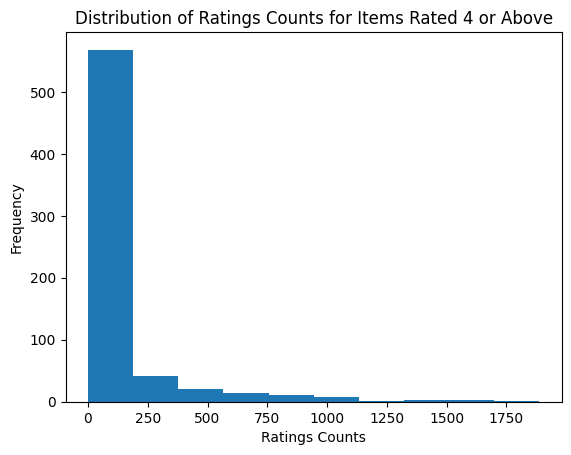

In [33]:
plt.hist(items_agg_4['count'])
plt.title('Distribution of Ratings Counts for Items Rated 4 or Above')
plt.xlabel('Ratings Counts')
plt.ylabel('Frequency');

Let's now investigate for items rated between 3 and 4.

In [34]:
items_agg_3_to_4 = items_agg.query('mean > 3 and mean < 4')
items_agg_3_to_4

,count,mean
item_id,,
67507,1357,3.963154
16411,1260,3.668254
57369,1133,3.701677
7443,1011,3.772502
49587,727,3.994498
...,...,...
152870,3,3.333333
148689,2,3.500000
151534,2,3.500000


In [35]:
items_agg_3_to_4['count'].describe()

,count
count,300.000000
mean,79.526667
std,179.277543
min,2.000000
25%,8.750000
50%,15.000000
75%,50.250000
max,1357.000000


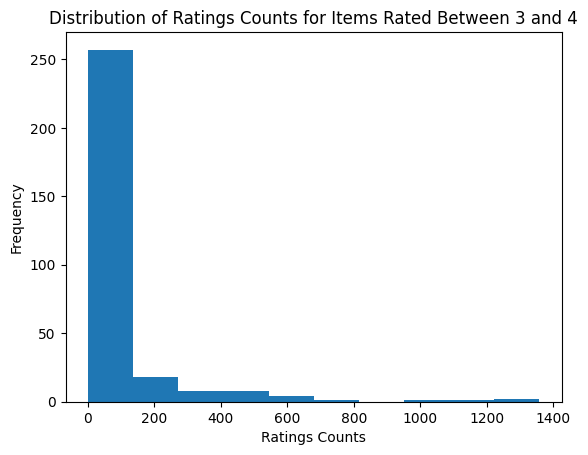

In [36]:
plt.hist(items_agg_3_to_4['count'])
plt.title('Distribution of Ratings Counts for Items Rated Between 3 and 4')
plt.xlabel('Ratings Counts')
plt.ylabel('Frequency');

Right-sknewss is shown.

Let's see how this might differ for items rated 3 or less.

In [37]:
items_agg_3 = items_agg.query('mean <= 3')
items_agg_3

,count,mean
item_id,,
142524,111,2.990991
153607,33,2.303030
149858,21,2.952381
154537,17,2.941176
153651,17,2.705882
148289,14,2.857143
152813,13,3.000000
152122,13,2.923077
153857,13,2.461538


In [38]:
items_agg_3['count'].describe()

,count
count,52.000000
mean,8.692308
std,15.653777
min,1.000000
25%,3.000000
50%,4.000000
75%,10.000000
max,111.000000


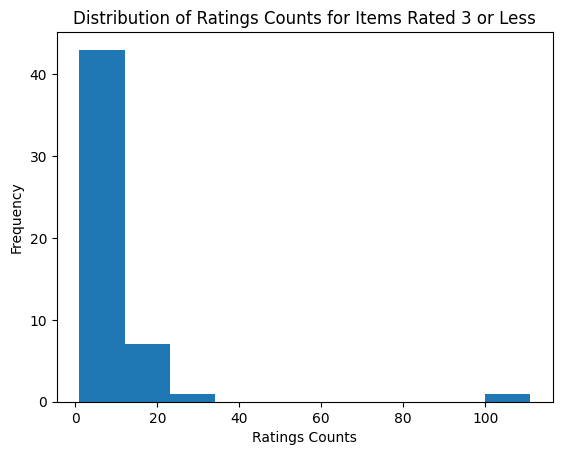

In [39]:
plt.hist(items_agg_3['count'])
plt.title('Distribution of Ratings Counts for Items Rated 3 or Less')
plt.xlabel('Ratings Counts')
plt.ylabel('Frequency');

Right-skewness is also shown here. In all, we see that regardless of the ratings, each threshold shows right-skewness.

For a much clearer side-by-side comparison, the same three distributions are plotted side-by-side.

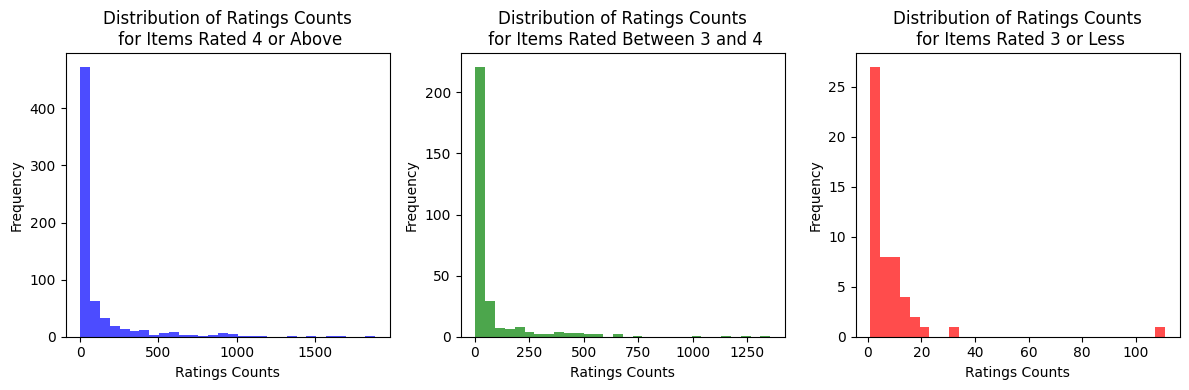

In [54]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot histograms
axes[0].hist(items_agg_4['count'], bins=30, color='blue', alpha=0.7)
axes[0].set_title('Distribution of Ratings Counts\n for Items Rated 4 or Above')
axes[1].hist(items_agg_3_to_4['count'], bins=30, color='green', alpha=0.7)
axes[1].set_title('Distribution of Ratings Counts\n for Items Rated Between 3 and 4')
axes[2].hist(items_agg_3['count'], bins=30, color='red', alpha=0.7)
axes[2].set_title('Distribution of Ratings Counts\n for Items Rated 3 or Less')

# Add labels and title
for ax in axes:
    ax.set_xlabel('Ratings Counts')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()